In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.tail()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
420,2020-09-26,4.692000e+08,-226400000.0,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
421,2020-09-27,5.272500e+08,-618750000.0,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
422,2020-09-28,7.438000e+08,-556200000.0,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09
423,2020-09-29,1.009250e+09,-772100000.0,1.548627e+11,-7.443120e+10,3.0,8.638740e+11,7.731039e+11,1.320539e+10,7.201773e+11,2.978684e+11,1.134856e+13,5.419050e+09
424,2020-09-30,6.861000e+08,-833250000.0,1.487817e+11,-8.860700e+10,3.0,7.373418e+11,7.743742e+11,1.311528e+10,7.540607e+11,2.759476e+11,1.140874e+13,5.271900e+09


In [4]:
df_k = df[['periode','kas_kantor']]

In [5]:
df_k.columns = ['ds','y']

In [6]:
df_k.ds = pd.to_datetime(df_k.ds)
df_k.tail()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ds,y
420,2020-09-26,1.123736e+13
421,2020-09-27,1.122373e+13
422,2020-09-28,1.126813e+13
423,2020-09-29,1.134856e+13
424,2020-09-30,1.140874e+13


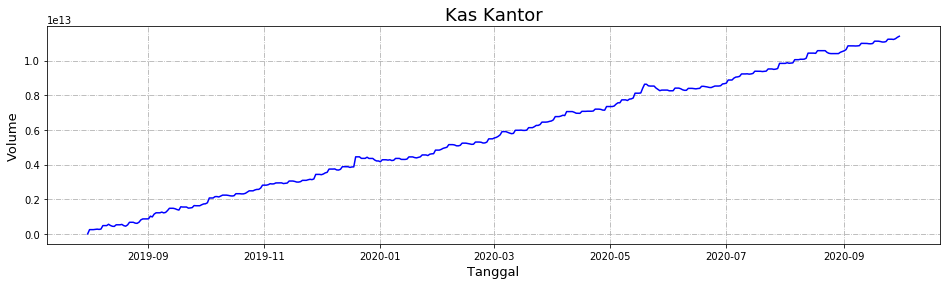

In [7]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

plt.plot(df_k.ds, df_k.y, 'b')

plt.title('Kas Kantor', fontsize=18)
plt.ylabel('Volume', fontsize=13)
plt.xlabel('Tanggal', fontsize=13)

plt.show()

Import hdays

In [8]:
from fbprophet import hdays

In [9]:
holidays_indo = hdays.Indonesia()
holidays_indo._populate(2020)
pd.DataFrame([holidays_indo], index=['holiday']).T.rename_axis('ds').reset_index()

C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


,ds,holiday
0,2020-01-01,New Year's Day
1,2020-01-25,Chinese New Year
2,2020-03-22,Ascension of the Prophet
3,2020-05-01,Labor Day
4,2020-05-21,Ascension of Jesus
5,2020-05-07,Buddha's Birthday
6,2020-06-01,Pancasila Day
7,2020-05-25,Eid al-Fitr
8,2020-08-17,Independence Day
9,2020-08-20,Islamic New Year


In [10]:
holiday = pd.DataFrame({'ds': pd.to_datetime(['2020-01-01','2020-01-25','2020-03-22','2020-05-01','2020-05-21','2020-05-07','2020-06-01','2020-05-25','2020-08-17','2020-08-20','2020-10-29']),
                       'holiday': ["New Year's Day","Chinese New Year","Ascension of the Prophet","Labor Day","Ascension of Jesus","Buddha's Birthday","Pancasila Day","Eid al-Fitr","Independence Day","Islamic New Year","Birth of the Prophet"]})

In [12]:
prophet = Prophet(changepoint_prior_scale=0.045, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative', holidays=holiday)

In [13]:
_ = prophet.fit(df_k)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
build_forecast_k = prophet.make_future_dataframe(periods=31, freq='D')

In [15]:
forecast_k = prophet.predict(build_forecast_k)

In [16]:
forecast_k = forecast_k[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

Menampilkan plot model

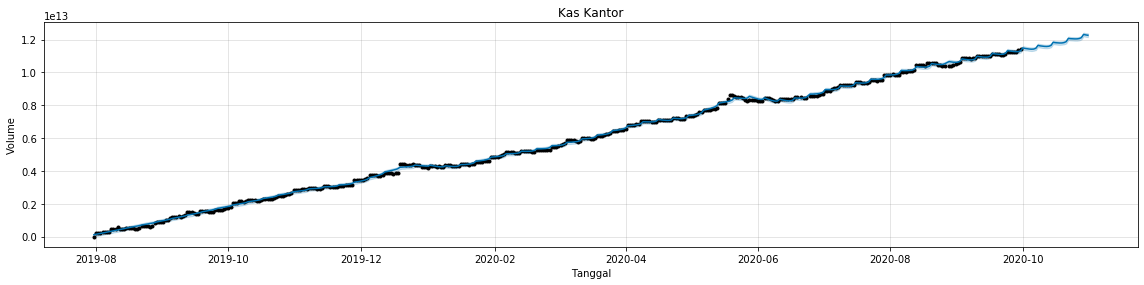

In [17]:
prophet.plot(forecast_k, xlabel='Tanggal', ylabel='Volume', figsize=(16,4))
plt.title('Kas Kantor')
plt.show()

In [18]:
forecast_k.tail()

,ds,yhat,yhat_upper,yhat_lower
451,2020-10-27,1.206321e+13,1.217119e+13,1.194970e+13
452,2020-10-28,1.211975e+13,1.222751e+13,1.200666e+13
453,2020-10-29,1.231382e+13,1.242717e+13,1.219828e+13
454,2020-10-30,1.228574e+13,1.239395e+13,1.217073e+13
455,2020-10-31,1.226521e+13,1.238043e+13,1.215630e+13


Cross Validation dan Performance Metrics

In [19]:
df_cv = cross_validation(prophet, initial='180 days', period='90 days', horizon='180 days')
df_p = performance_metrics(df_cv)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-03 00:00:00 and 2020-04-03 00:00:00
C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
df_cv
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,17 days,1.488312e+25,3.857865e+12,2.930243e+12,0.415952,0.308450,0.0
1,18 days,1.997498e+25,4.469338e+12,3.472142e+12,0.492432,0.380294,0.0
2,19 days,2.627575e+25,5.125988e+12,4.067755e+12,0.576306,0.467019,0.0
3,20 days,3.382521e+25,5.815944e+12,4.710906e+12,0.665434,0.557197,0.0
4,21 days,4.293561e+25,6.552527e+12,5.411263e+12,0.762431,0.638804,0.0
...,...,...,...,...,...,...,...
156,176 days,2.059518e+24,1.435102e+12,1.410898e+12,0.127434,0.121090,0.0
157,177 days,1.917877e+24,1.384874e+12,1.367977e+12,0.123394,0.118324,0.0
158,178 days,1.797026e+24,1.340532e+12,1.329481e+12,0.119735,0.116810,0.0
159,179 days,1.695767e+24,1.302216e+12,1.294969e+12,0.116403,0.115149,0.0


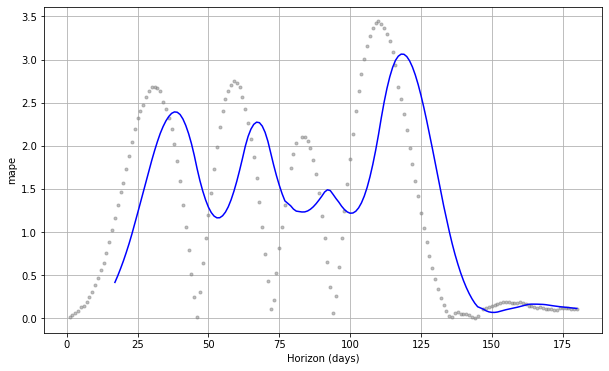

In [21]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Membangun model di kas_echannel

Membuat dataframe kas_echannel

In [22]:
df_e = df[['periode', 'kas_echannel']]

In [23]:
df_e.columns = ['ds','y']

In [24]:
df_e.ds = pd.to_datetime(df_e.ds)
df_e.tail()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ds,y
420,2020-09-26,5.085800e+09
421,2020-09-27,4.994300e+09
422,2020-09-28,5.181900e+09
423,2020-09-29,5.419050e+09
424,2020-09-30,5.271900e+09


Menampilkan plot kas_echannel

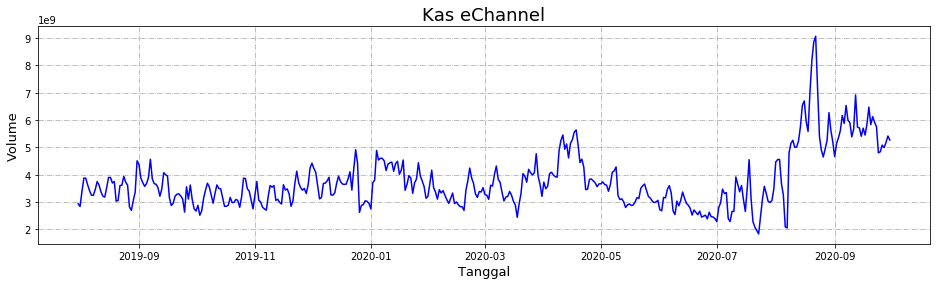

In [25]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

plt.plot(df_e.ds, df_e.y, 'b')

plt.title('Kas eChannel', fontsize=18)
plt.ylabel('Volume', fontsize=13)
plt.xlabel('Tanggal', fontsize=13)

plt.show()

Membuat model

In [26]:
prophet = Prophet(changepoint_prior_scale=0.045, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative', holidays=holiday)

In [27]:
_ = prophet.fit(df_e)

C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [28]:
build_forecast_e = prophet.make_future_dataframe(periods=31, freq='D')

In [29]:
forecast_e = prophet.predict(build_forecast_e)

In [30]:
forecast_e = forecast_e[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

Menampilkan plot model

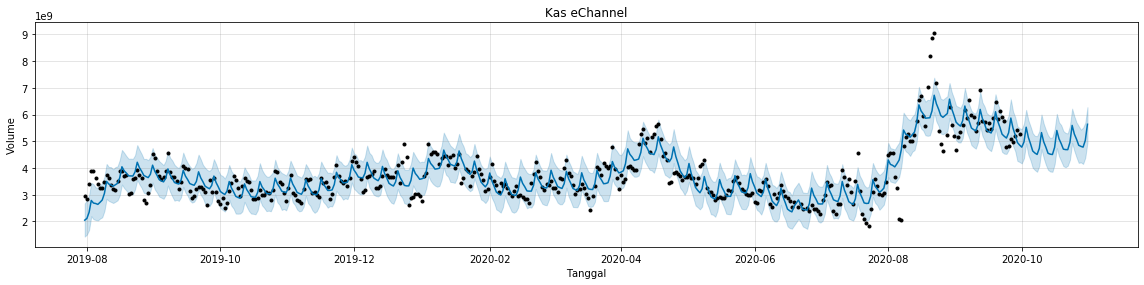

In [31]:
prophet.plot(forecast_e, xlabel='Tanggal', ylabel='Volume', figsize=(16,4))
plt.title('Kas eChannel')
plt.show()

In [36]:
forecast_e.tail()

,ds,yhat,yhat_upper,yhat_lower
451,2020-10-27,4.853073e+09,5.569257e+09,4.194664e+09
452,2020-10-28,4.812473e+09,5.438617e+09,4.214319e+09
453,2020-10-29,4.784047e+09,5.509231e+09,4.155249e+09
454,2020-10-30,5.031073e+09,5.691742e+09,4.388031e+09
455,2020-10-31,5.639443e+09,6.280292e+09,4.964345e+09


### Membuat File Submisi

Membuat tiga file submisi yang terdiri dari:
- huruf a untuk yhat
- huruf b untuk yhat_upper
- huruf c untuk yhat_lower

Alasan membuat tiga file untuk submisi adalah memperbesar peluang mendapatkan prediksi paling baik.
Kolom y_hat adalah prediksi utama, namun fungsi dari yhat_upper dan yhat_lower adalah sebagai range prediksi alternatif saat yhat kurang akurat prediksinya.

In [33]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:31, 1] = forecast_k.iloc[425:,1]
submission.iloc[31:, 1] = forecast_e.iloc[425:,1]
submission.to_csv('submission_a.csv', index=False)

In [34]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:31, 1] = forecast_k.iloc[425:,2]
submission.iloc[31:, 1] = forecast_e.iloc[425:,2]
submission.to_csv('submission_b.csv', index=False)

In [35]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:31, 1] = forecast_k.iloc[425:,3]
submission.iloc[31:, 1] = forecast_e.iloc[425:,3]
submission.to_csv('submission_c.csv', index=False)